In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Index(['Zeit', 'Geschwindigkeit OK', 'Weg OK', 'pI1', 'pI2', 'pNAcc', 'pIM',
       'V1', 'V2'],
      dtype='object')


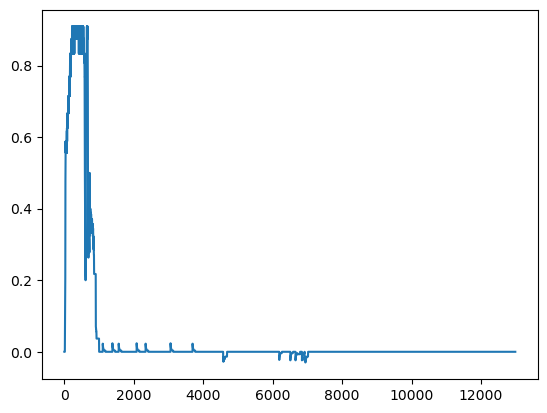

In [210]:
velocity = pd.read_csv("2023_11_30-8_34_26_shotCurve.csv")
velocity=velocity.iloc[1:,:]
print(velocity.columns)
plt.plot(velocity["Zeit"],velocity['Geschwindigkeit OK'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


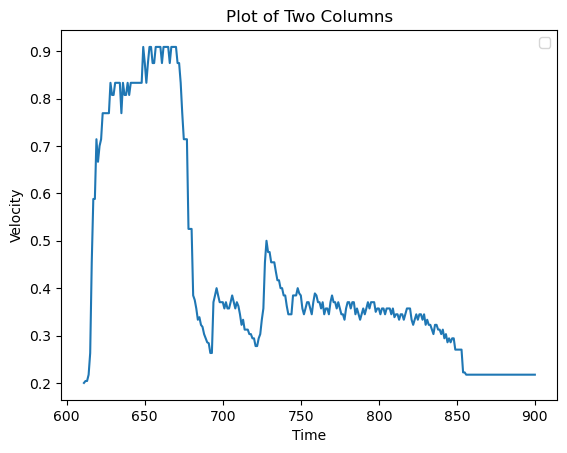

In [211]:
velocity_filtered = velocity[(velocity['Zeit'] > 610) & (velocity['Zeit'] <=900)]
velocity_filtered = velocity_filtered.drop(columns = ["pI1", "pI2", 'pNAcc', "V1", "V2"])
velocity_filtered = velocity_filtered.rename(columns = {'Geschwindigkeit OK': "Upper_Piston"})
velocity_filtered = velocity_filtered.rename(columns = {'pIM': "ActPress"})

plt.plot(velocity_filtered["Zeit"],velocity_filtered['Upper_Piston'])
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Plot of Two Columns')
plt.legend()
plt.show()

In [212]:
def set_velocity(row):
    if 610 <= row['Zeit'] <= 640:
        return row['Upper_Piston']
    else:
        return 0


velocity_filtered['Lower_Piston'] = velocity_filtered.apply(set_velocity, axis=1)

In [213]:
velocity_filtered['NewZeit'] = (velocity_filtered['Zeit'] - velocity_filtered['Zeit'].min())

In [214]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Upper_Piston'], mode='lines', name='Upper_Piston'))
fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Lower_Piston'], mode='lines', name='Lower_Piston'))

fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['ActPress'], mode='lines', name='Pressure', yaxis = "y2"))

fig.update_layout(
    yaxis2=dict(
        title='Pressure',
        overlaying='y',
        side='right'
    ),
    xaxis_title='Time (ms)',
    yaxis=dict(title='Velocities'),
    title='Time vs Velocity and Pressure',
    legend_title='Parameters'
)

In [196]:
#velocity_filtered['Zeit'] = (velocity_filtered['Zeit'] - velocity_filtered['Zeit'].min() + 1)/1000
#velocity_filtered['Upper_Piston'] = -1*(velocity_filtered['Upper_Piston'])
#velocity_filtered['Lower_Piston'] = -1*(velocity_filtered['Lower_Piston'])
#velocity_filtered

In [216]:
fig = go.Figure()
velocity_filtered = velocity_filtered[velocity_filtered['NewZeit'] <= 250]

fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Upper_Piston'], mode='lines', name='Upper_Piston'))
fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Lower_Piston'], mode='lines', name='Lower_Piston'))

#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['pIM'], mode='lines', name='Pressure', yaxis = "y2"))

fig.update_layout(
    yaxis2=dict(
        title='Pressure',
        overlaying='y',
        side='right'
    ),
    xaxis_title='Time (ms)',
    yaxis=dict(title='Velocity (m/s)'),
    title='Time vs Velocity',
    legend_title='Parameters'
)

In [198]:
import pandas as pd
pressure = pd.read_csv("Pressureentry.csv", skiprows=5, names=['Time', 'Pressure'])
pressure['time'] = pressure['Time']*1000
pressure['Pressure'] = pressure['Pressure']/1000
pressure.drop(columns =['Time'], axis =1, inplace = True)
pressure


,Pressure,time
0,0.000000,0.00
1,-0.000002,3.13
2,0.000058,4.86
3,0.000314,6.55
4,0.001050,7.24
...,...,...
254,-0.168000,131.00
255,0.125000,132.00
256,-0.471000,132.00
257,0.265000,133.00


In [199]:
pressure.drop_duplicates(['time'], inplace = True)

In [200]:
time_range = pd.Series(velocity_filtered['NewZeit'])
interpolated_pressure = pd.Series(
    data=pressure.set_index('time').reindex(
        time_range, method='nearest')['Pressure'].values,
    index=velocity_filtered.index
)

velocity_filtered['Pressure'] = interpolated_pressure
velocity_filtered

,Zeit,Upper_Piston,Weg OK,ActPress,Lower_Piston,NewZeit,Pressure
611,611,0.20000,465.25,21.26523,0.20000,0,0.000000
612,612,0.20408,465.75,23.41660,0.20408,1,0.000000
613,613,0.20408,466.50,20.62962,0.20408,2,-0.000002
614,614,0.21739,467.25,16.94563,0.21739,3,-0.000002
615,615,0.26316,467.75,15.31012,0.26316,4,0.000058
...,...,...,...,...,...,...,...
896,896,0.21739,574.75,221.86026,0.00000,285,0.265000
897,897,0.21739,574.75,221.14531,0.00000,286,0.265000
898,898,0.21739,574.75,221.32132,0.00000,287,0.265000
899,899,0.21739,574.75,220.61440,0.00000,288,0.265000


In [201]:
#velocity_filtered=velocity_filtered[velocity_filtered['Pressure'] < 22000]


In [184]:
import plotly.graph_objects as go

fig = go.Figure()

#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Upper_Piston'], mode='lines', name='Upper_Piston'))
#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Lower_Piston'], mode='lines', name='Lower_Piston'))
#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Pressure'], mode='lines', name='Pressure',  yaxis = "y2"))
fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['ActPress']*100, mode='lines', name='Pressure'))
fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Pressure'], mode='lines', name='Pressure'))

fig.update_layout(
    yaxis2=dict(
        title='Pressure (KPa)',
        overlaying='y',
        side='right'
    ),
    xaxis_title='Time (ms)',
    yaxis=dict(title='Velocities'),
    title='Time vs Velocity and Pressure',
    legend_title='Parameters'
)

In [204]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['ActPress'], mode='lines', name='Experimental'))
fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=(velocity_filtered['Pressure']), mode='lines', name='Simulation'))

fig.update_layout(

    xaxis_title='Time (ms)',
    yaxis=dict(title='Pressures(KPa)'),
    title='Time vs Pressure',
    legend_title='Parameters'
)

In [105]:
velocity_filtered.to_csv("Ansys_Pressure.csv")

In [106]:
metalvel = pd.read_csv("Velocityatentry.csv", skiprows=5, names=['time', 'Velocity'])
metalvel['time'] = metalvel['time']*1000
#metalvel['Pressure'] = pressure['Pressure']/1000

In [208]:
velocity_filtered = velocity_filtered[velocity_filtered['NewZeit'] <= 100]
metalvel = metalvel[metalvel['time'] <= 90]
pressure = pressure[pressure['time'] <= 90]

fig = go.Figure()

#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Upper_Piston'], mode='lines', name='Upper_Piston'))
#fig.add_trace(go.Scatter(x=velocity_filtered['NewZeit'], y=velocity_filtered['Lower_Piston'], mode='lines', name='Lower_Piston'))
fig.add_trace(go.Scatter(x=metalvel['time'], y=metalvel['Velocity'], mode='lines', name='metal velocity'))
fig.add_trace(go.Scatter(x=pressure['time'], y=pressure['Pressure'], mode='lines', name='Pressure',  yaxis = "y2"))


fig.update_layout(
    yaxis2=dict(
        title='Pressure (KPa)',
        overlaying='y',
        side='right'
    ),
    xaxis_title='Time (ms)',
    yaxis=dict(title='Velocity (m/s)'),
    title='Metal Velocity and Pressure',
    legend_title='Parameters'
)

In [108]:
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
import pandas as pd
import numpy as np

df = pd.read_csv('Ansys_Pressure.csv')  
fps = 8 

def make_frame_mpl(t):
    # Determine the current index based on the time and frame rate
    index = int(t * fps)  # Update '5' to your specific frequency
    current_time = df.iloc[index]['NewZeit']
    
    # Create the plot
    fig, ax1 = plt.subplots()

    # Plot Upper and Lower Pistons
    ax1.plot(df['NewZeit'][:index+1], df['Upper_Piston'][:index+1], label='Upper Piston', color='b')
    ax1.plot(df['NewZeit'][:index+1], df['Lower_Piston'][:index+1], label='Lower Piston', color='r')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Velocity', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(df['NewZeit'][:index+1], df['Pressure'][:index+1], label='Pressure', color='g')
    ax2.set_ylabel('Pressure (KPa)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Title and legend
    fig.suptitle('Time vs Velocity and Pressure')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    
    time_annotation = ax1.text(0.5, 0.95, f'Time: {current_time/1000:.3f} s', transform=ax1.transAxes, fontsize=9,
                               verticalalignment='top', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
    
    # Convert the Matplotlib figure to a numpy array and close the plot
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image




image = make_frame_mpl(10)


duration = len(df) * 1 / fps 

animation_clip = VideoClip(make_frame_mpl, duration=duration)


output_video_path = 'plot_animation.mp4'
animation_clip.write_videofile(output_video_path, fps=fps)


Moviepy - Building video plot_animation.mp4.
Moviepy - Writing video plot_animation.mp4



t:   1%|          | 3/290 [00:00<00:17, 16.85it/s, now=None]

Moviepy - Done !
Moviepy - video ready plot_animation.mp4


In [109]:
import plotly.graph_objects as go
import numpy as np

time_simulated = np.linspace(0, 0.045, 100)
velocity_simulated = 1.5 + (time_simulated * 2.4)


trace = go.Scatter(
    x=time_simulated,
    y=velocity_simulated,
    mode='lines',
    name='Simulated Piston Velocity'
)


fig = go.Figure(data=[trace])

fig.update_layout(
    title='Piston Velocity vs Time',
    xaxis_title='Time(s)',
    yaxis_title='Piston Velocity(m/s)',
    plot_bgcolor='rgba(35, 35, 35, 1)',  # Dark gray background in the plot area
    paper_bgcolor='rgba(10, 10, 10, 1)',  # Almost black background around the plot area
    font=dict(color='white'),  # White text for better contrast on dark background
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(100, 100, 100, 0.5)',  # Light gray grid lines
        zerolinecolor='rgba(100, 100, 100, 0.5)'  # Light gray zero line
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(100, 100, 100, 0.5)',  # Light gray grid lines
        zerolinecolor='rgba(100, 100, 100, 0.5)'  # Light gray zero line
    )
)

# Show the plot
fig.show()